# Teste de Hipótese para a Média (uma variável)

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [1]:
#Importando pacotes
import pandas as pd
from google.colab import drive

#Montando drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importar Bases
df_ideb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Atividades/S2D4/ideb.csv')

In [4]:
df_ideb = df_ideb[['ano','sigla_uf','taxa_aprovacao', 'nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb']]
df_ideb.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.8,150.80,2.4
1,2005,AC,53.9,167.8,165.60,2.3
2,2005,AC,49.3,151.8,149.60,1.8
3,2005,AC,48.8,163.6,155.80,1.9
4,2005,AC,48.8,159.0,153.39,1.9


### Atividade 2: Verifique quantas linhas e colunas possui esse dataframe. Veja também se há dados faltantes.

In [5]:
df_ideb.shape

(130194, 6)

In [6]:
df_ideb.isna().sum()

ano                                0
sigla_uf                           0
taxa_aprovacao                 26736
nota_saeb_matematica           41849
nota_saeb_lingua_portuguesa    41849
ideb                           29825
dtype: int64

In [7]:
df_ideb.isnull().sum()

ano                                0
sigla_uf                           0
taxa_aprovacao                 26736
nota_saeb_matematica           41849
nota_saeb_lingua_portuguesa    41849
ideb                           29825
dtype: int64

In [8]:
df_ideb.loc[df_ideb['nota_saeb_matematica'].isnull() == True]

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
2254,2015,AC,96.8,NaN,NaN,7.6
2255,2015,AM,97.2,NaN,NaN,8.2
2256,2015,AM,97.9,NaN,NaN,7.1
2257,2015,CE,97.5,NaN,NaN,7.1
2258,2015,CE,97.5,NaN,NaN,7.1
...,...,...,...,...,...,...
129361,2015,SP,99.1,NaN,NaN,6.7
129362,2015,SP,93.4,NaN,NaN,6.7
129363,2015,SP,93.3,NaN,NaN,6.7
129364,2015,SP,99.4,NaN,NaN,6.7


### Atividade 3: Teste a hipótese de a média da taxa de aprovação para o ano de 2005 ser igual a 78. Considere um nível de confiança de 95%.

Descreva, sucintamente, o resultado do teste de hipótese. Não esqueça de incluir as estatísticas encontradas.

Dica: crie um DataFrame somente com os valores do ano e da variável de interesse.


In [9]:
df_ideb_2005 = df_ideb[df_ideb['ano']==2005][['ano','taxa_aprovacao']]
df_ideb_2005.head()

,ano,taxa_aprovacao
0,2005,64.1
1,2005,53.9
2,2005,49.3
3,2005,48.8
4,2005,48.8


In [10]:
from scipy.stats import ttest_1samp

In [11]:
ttest_1samp(a=df_ideb_2005['taxa_aprovacao'].dropna(), popmean=78)

TtestResult(statistic=20.890080427394643, pvalue=3.1469508067020596e-95, df=12082)

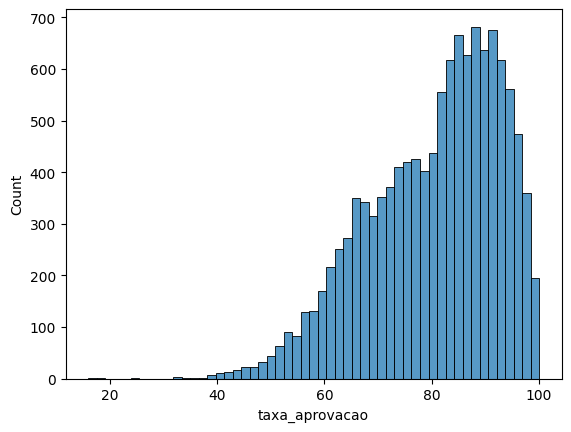

In [12]:
import seaborn as sns

sns.histplot(data=df_ideb_2005.dropna(), x='taxa_aprovacao');

Considerando que p valor é muito menor do que 0,05, rejeitamos a hipótese nula, ou seja, a média não é igual a 78. Observando o histograma, podemos inferir que a média é maior do que 78.

# Teste de Hipótese para a Média (duas variáveis independentes)

Agora vamos aplicar um teste de hipótese para a média de duas populações independentes usando dados reais. Desejamos saber se a média para ambas é a mesma.

### Atividade 4: Teste a hipótese de a média do IDEB para os estados do Rio Grande do Sul e do Ceará, no ano de 2019, serem iguais. Considere um nível de confiança de 95%

Dica: Primeiro crie um dataframe auxiliar contendo apenas os dados referentes a 2019. Depois selecione dois conjunto de valores de IDEB, um apenas para o estado do Rio Grande do Sul e outro apenas para o estado do Ceará.

In [13]:
df_ideb_rs = df_ideb[(df_ideb['ano']==2019) & (df_ideb['sigla_uf']=='RS')][['sigla_uf','ideb']].dropna()
df_ideb_rs.head()

,sigla_uf,ideb
3836,RS,7.5
3837,RS,7.1
3838,RS,7.3
3839,RS,7.5
3840,RS,8.0


In [14]:
df_ideb_ce = df_ideb[(df_ideb['ano']==2019) & (df_ideb['sigla_uf']=='CE')][['sigla_uf','ideb']].dropna()
df_ideb_ce.head()

,sigla_uf,ideb
3424,CE,7.3
3425,CE,7.3
3426,CE,7.3
3427,CE,7.3
3428,CE,8.3


In [15]:
from scipy.stats import ttest_ind

In [16]:
ttest_ind(a=df_ideb_ce['ideb'], b=df_ideb_rs['ideb'], equal_var=False)

Ttest_indResult(statistic=3.9541302761146584, pvalue=8.673400907588078e-05)

Hipótese nula rejeitada.

### Atividade 5: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB dos dois estados.

In [17]:
df_join = pd.concat([df_ideb_rs,df_ideb_ce])
df_join.head()

,sigla_uf,ideb
3836,RS,7.5
3837,RS,7.1
3838,RS,7.3
3839,RS,7.5
3840,RS,8.0


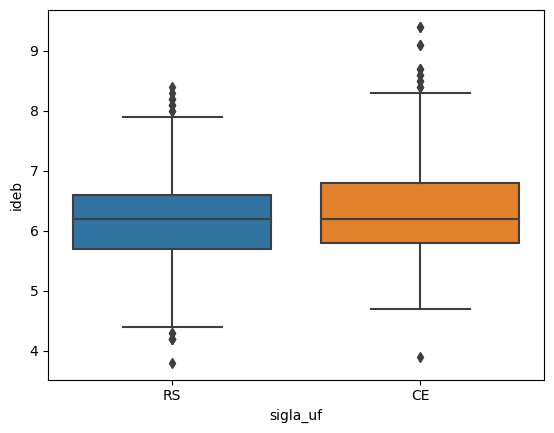

In [18]:
sns.boxplot(x=df_join['sigla_uf'], y=df_join['ideb']);

Observando o boxplot, inferimos que o ideb do CE é maior.

### Atividade 6: Teste a hipótese de a média do IDEB para os anos de 2005 e 2019 serem iguais. Considere um nível de confiança de 95%

Dica: Crie dois dataframes auxiliares e selecione 300 linhas de cada um apenas (sem conter valores faltantes) para realizar o teste.

In [19]:
df_2005 = df_ideb[df_ideb['ano']==2005][['ano','ideb']].dropna()[:300]
df_2005.head()

,ano,ideb
0,2005,2.4
1,2005,2.3
2,2005,1.8
3,2005,1.9
4,2005,1.9


In [20]:
df_2019 = df_ideb[df_ideb['ano']==2019][['ano','ideb']].dropna()[:300]
df_2019.head()

,ano,ideb
3409,2019,8.1
3410,2019,8.9
3411,2019,8.9
3412,2019,8.1
3413,2019,8.1


In [21]:
from scipy.stats import ttest_rel

In [22]:
ttest_rel(a=df_2005['ideb'], b=df_2019['ideb'])

TtestResult(statistic=-163.87518962388705, pvalue=8.329734374233758e-295, df=299)

### Atividade 7: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB para os dois anos.

In [23]:
df_ano_join = pd.concat([df_2005,df_2019])

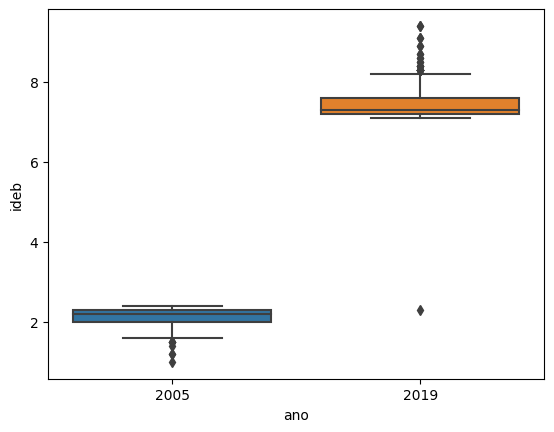

In [24]:
sns.boxplot(x=df_ano_join['ano'], y=df_ano_join['ideb']);

Valor p foi bastante abaixo de 0,05, então rejeitamos a hipótese nula. Comparando os boxplot, concluímos que o ideb de 2019 é maior.

# Análise de Variância (ANOVA) One-Way

### Atividade 8: Vamos comparar a média do IDEB para os três estados da região sul, em 2019, para ver se estas médias podem ser consideradas iguais. Considere um nível de confiança de 95%.

Dica: Crie três dataframes auxiliares, um para cada estado.

In [25]:
df_ideb_rs = df_ideb[(df_ideb['ano']==2019) & (df_ideb['sigla_uf']=='RS')][['sigla_uf','ideb']].dropna()
df_ideb_rs.head()

,sigla_uf,ideb
3836,RS,7.5
3837,RS,7.1
3838,RS,7.3
3839,RS,7.5
3840,RS,8.0


In [26]:
df_ideb_sc = df_ideb[(df_ideb['ano']==2019) & (df_ideb['sigla_uf']=='SC')][['sigla_uf','ideb']].dropna()
df_ideb_sc.head()

,sigla_uf,ideb
3961,SC,7.4
3962,SC,7.2
3963,SC,7.2
3964,SC,7.5
3965,SC,7.9


In [27]:
df_ideb_pr = df_ideb[(df_ideb['ano']==2019) & (df_ideb['sigla_uf']=='PR')][['sigla_uf','ideb']].dropna()
df_ideb_pr.head()

,sigla_uf,ideb
3714,PR,7.6
3715,PR,7.6
3716,PR,7.1
3717,PR,7.1
3718,PR,8.3


In [28]:
from scipy.stats import f_oneway

In [30]:
f_oneway(df_ideb_pr['ideb'],df_ideb_sc['ideb'],df_ideb_rs['ideb'])

F_onewayResult(statistic=27.712354138245196, pvalue=1.2331589284254783e-12)

Com base no valor p, podemos rejeitar a hipótese nula, concluindo que ao menos um estado tem IDEB diferente.

### Atividade 9: Faça um boxplot para entender melhor o que está acontecendo com os valores do IDEB para os três estados.

In [31]:
df_sul = pd.concat([df_ideb_pr,df_ideb_sc,df_ideb_rs])

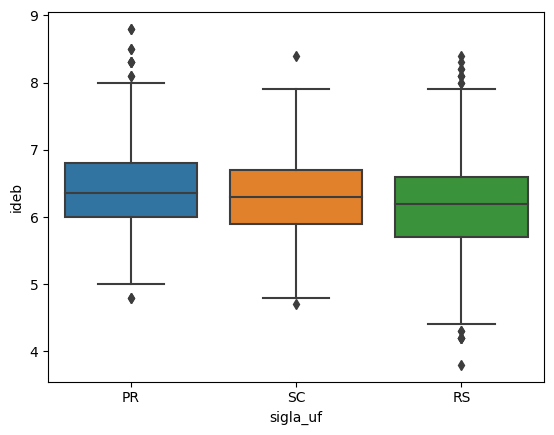

In [32]:
sns.boxplot(x=df_sul['sigla_uf'], y=df_sul['ideb']);

### Atividade 10: Faça um teste Post-hoc para verificar se de fato é o estado de Santa Catarina tem média diferente dos demais estados.

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [34]:
print(pairwise_tukeyhsd(endog=df_sul['ideb'], groups=df_sul['sigla_uf'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    PR     RS  -0.2294    0.0  -0.302 -0.1568   True
    PR     SC  -0.1123 0.0035 -0.1936  -0.031   True
    RS     SC   0.1171 0.0009  0.0414  0.1928   True
----------------------------------------------------


Observando o posthoc, concluímos que todos os estados tem IDEBs diferentes entre si, pois o valor p é inferior a 0,05 em todos os casos.